<a href="https://colab.research.google.com/github/AlexanderOntiveros/IAyRN-2001598/blob/main/AF5_Procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [175]:
"Titulo: AF 5: Procesamiento de conjuntos de datos en Python"
"Nombre: Rodrigo Alexander Ontiveros Mendez - Matricula: 2001598"
"Andres Murguía Valencia - 2173973"
"Luis Enrique Salazar Matrón - 2047932"
"Hora: Martes(N4-N6)"

'Hora: Martes(N4-N6)'

In [167]:
#Ejercicio 1.- Análisis y normalización de datos de sensores en un robot móvil
# Cargar librerías Pandas, Numpy y Matplotlib
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [168]:
# Fuente: https://github.com/dilp90/InteligenciaArtificial_y_RedesNeuronales_UANL_FIME/blob/main/MachineLearning/Datasets/robot_sensors.csv
# Cargar datos desde un archivo CSV
df = pd.read_csv('/content/robot_sensors.csv')

In [169]:
# Mostrar las primeras 11 líneas de datos.
print(df.head(25))
print(df.shape)

    Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0            0       43.708611          9.256646         23.925585
1            1       95.564288         27.095047         23.704682
2            2       75.879455         43.647292         33.593819
3            3       63.879264         36.611244         23.743193
4            4       24.041678         40.328057         24.079246
5            5       24.039507         32.939168         31.390974
6            6       15.227525         34.613828         26.746098
7            7       87.955853         42.459783         31.650658
8            8       64.100351         12.483400         20.980492
9            9       73.726532         24.471248         27.313568
10          10       11.852604         11.060472         20.504204
11          11       97.291887         49.383400         20.939798
12          12       84.919838         47.202967         33.596562
13          13       29.110520          1.971341         22.08

In [165]:
# Verificar si hay valores nulos (missing values) en alguna columna
print(df.isnull().sum())

Tiempo (s)          0
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


In [170]:
 # Si encuentras valores nulos, eliminar las filas que contienen datos faltantes utilizando el comando Dropna().
df.dropna(subset=['Distancia (cm)'], inplace=True)
df.dropna(subset=['Velocidad (cm/s)'], inplace=True)
df.dropna(subset=['Temperatura (°C)'], inplace=True)

In [171]:
# Verificar si hay valores negativos
# Verificar si hay valores negativos restantes
valores_negativos = (df[['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']] < 0).sum()
print("Número de valores negativos por unidad:")
print(valores_negativos)

Número de valores negativos por unidad:
Distancia (cm)      0
Velocidad (cm/s)    0
Temperatura (°C)    0
dtype: int64


In [172]:
# Filtra todos los valores atípicos (Velocidad Negativa-)
df = df[df['Distancia (cm)'] >= 0]
df = df[df['Velocidad (cm/s)'] >= 0]
df = df[df['Temperatura (°C)'] >= 0]

In [173]:
# Normalizar los datos numéricos con Min-Max Scaling
robot_sensors = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Crear una copia1 para no modificar el original si es necesario
df_normalized_np = df.copy()

# Normalizar manualmente con NumPy
for col in robot_sensors:
    col_data = df_normalized_np[col].values
    min_val = np.min(col_data)
    max_val = np.max(col_data)
    # Evitar división por cero si max_val == min_val
    if max_val - min_val != 0:
        df_normalized_np[col] = (col_data - min_val) / (max_val - min_val)
    else:
        # Si todos los valores son iguales, la normalización resulta en 0 (o se mantiene igual)
        df_normalized_np[col] = 0

# Mostrar las primeras filas del copia1 con los datos normalizados por NumPy
print("DataFrame con datos normalizados (Min-Max Scaling con NumPy):")
print(df_normalized_np.head())

DataFrame con datos normalizados (Min-Max Scaling con NumPy):
   Tiempo (s)  Distancia (cm)  Velocidad (cm/s)  Temperatura (°C)
0           0        0.371735          0.182609          0.262269
1           1        0.950755          0.540740          0.247509
2           2        0.730954          0.873049          0.908233
3           3        0.596960          0.731791          0.250082
4           4        0.152134          0.806411          0.272535


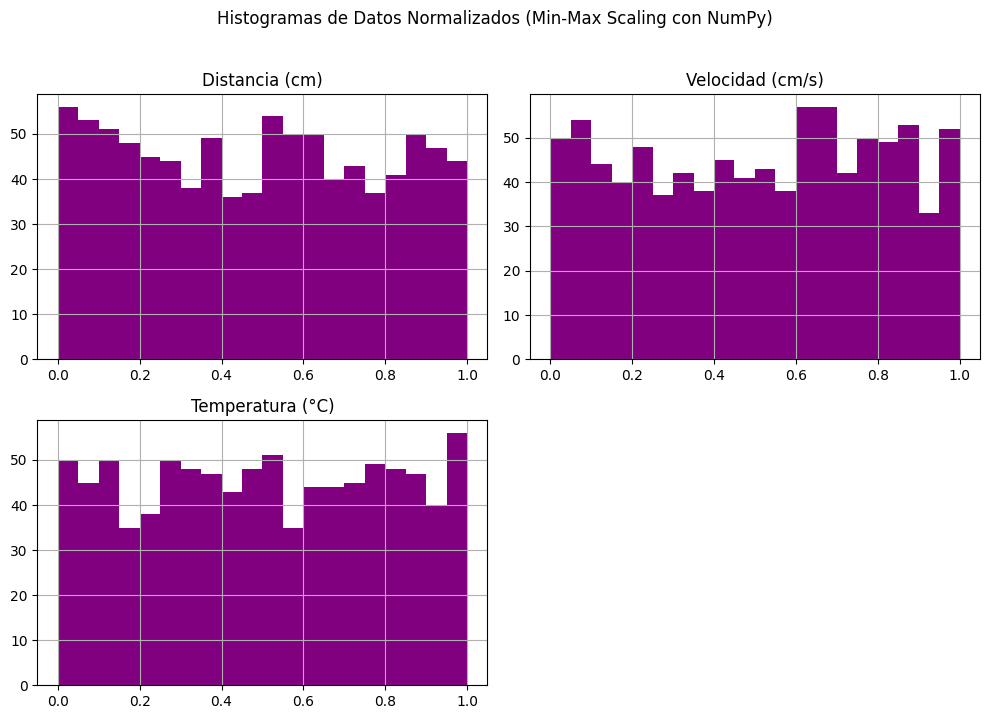

In [174]:
# Seleccionar las columnas numéricas normalizadas con NumPy
robot_sensors = ['Distancia (cm)', 'Velocidad (cm/s)', 'Temperatura (°C)']

# Crear histogramas para cada columna normalizada
df_normalized_np[robot_sensors].hist(bins=20, color='purple', figsize=(10, 7))
plt.suptitle("Histogramas de Datos Normalizados (Min-Max Scaling con NumPy)", y=1.02)
plt.tight_layout()
plt.show()